# Introduction

Ici nous allons utiliser tensorflow pour la premiere fois afin de classer des chiffres "MNIST".

In [1]:
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import random

Dans le code qui suit nous allons charger les donnees MNIST, le code se chargera de telecharger les donnees pour vous, laissez lui un peu de temps.

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


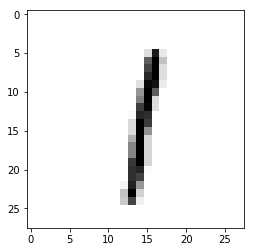

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
s = ax.imshow(random.choice(mnist.test.images).reshape((28,28)), cmap = matplotlib.cm.binary)
plt.show()

Ci-dessus un exemple aleatoire de chiffre MNIST. Le code a peu d'interet, ne vous attardez pas dessus.

In [4]:
x = tf.placeholder(tf.float32, [None, 28*28])
classes = tf.placeholder(tf.float32, [None, 10])

Nos images font 28x28 pixels, nous avons donc besoin d'un moyen de donner ces images a notre modele, comme nous ne les envoyons pas au modele pendant que nous le construisons nous utilisons un **placeholder**.

Nous utilisons egalement un **placeholder** pour les classes. Par exemple un chiffre '1' aura pour classe [1, 0, 0, 0, 0, 0, 0, 0, 0, 0] et le chiffre '5' aura pour classe [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], c'est pourquoi nous avons 10 comme dimension. 

In [5]:
W = tf.Variable(tf.zeros([28*28, 10]))
b = tf.Variable(tf.zeros([10]))

Voila le modele, nous utilisons 10 neurones, 1 par chiffre possible, chaque neurone prend en entree tous les pixels nous avons donc besoin d'une matrice 28x28 = 784, 784x10.

La variable b est notre bias, nous reviendrons sur son utilite dans un prochain chapitre.

In [10]:
y = tf.matmul(x, W) + b

Nous multiplions x qui etait notre placeholder de dimension Nx784 avec notre matrice W de dimension 784x10 ce qui donne une matrice Nx10 a laquelle nous ajoutons notre bias. 

In [11]:
cross_entropy = tf.reduce_mean(
      tf.nn.softmax_cross_entropy_with_logits(labels=classes, logits=y))

Ici nous definissons notre fonction de cout, elle applique egalement la fonction **softmax** sur **y**.

La fonction **softmax**:
![softmax](https://static1.squarespace.com/static/54d1b23de4b0bce5ca12450e/t/5757319c0442623f70722a0b/1465332170338/)

In [12]:
entrainement = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

Nous utilisons la methode de descente de gradient pour minimiser notre fonction de cout. 

![descente de gradient](http://images.slideplayer.fr/4/1570133/slides/slide_97.jpg)


In [13]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

Notre modele etant fini nous pouvons lancer une session tensorflow et initialiser toutes nos variables.

In [16]:
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(entrainement, feed_dict={x: batch_xs, classes: batch_ys})

In [21]:
# Test trained model
prediction = tf.equal(tf.argmax(y, 1), tf.argmax(classes, 1))
performance = tf.reduce_mean(tf.cast(prediction, tf.float32))
taux_reussite = sess.run(performance, feed_dict={x: mnist.test.images,
                                  classes: mnist.test.labels})

print("Taux de reussite: " + str(taux_reussite))

Taux de reussite: 0.9189


Voila qui conclu l'introduction!

**Exercice:** Utiliser la fonction prediction sur une image aleatoire random.choice(mnist.test.images) et l'afficher afin de verifier si vous etes d'accord avec la prediction du modele.